In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def _read_fastq(input_file):
    # open and read all lines in the fastq file
    read_lines = []
    with open(input_file, 'r') as fastq_file:
        for lines in fastq_file:
            read_lines.append(lines)
        return read_lines


In [13]:
def parse_fastq(input_file):
    sequence_list = []
    fastq_lines = _read_fastq(input_file=input_file)
    # break into groups of 4
    for line in range(0, len(fastq_lines), 4):
        single_sequence = fastq_lines[line:line + 4]
        sequence_list.append(single_sequence)
    sequence_df = pd.DataFrame(sequence_list, columns=['seq_id', 'reads', 'id2', 'seq_qc'])
    print(f"The count of reads is {len(sequence_df['reads'])}")
    print("Histogram of read lengths")
    dist = sequence_df['reads'].apply(len)
    print(f"read_distribution {dist.describe()}")
    print("*******************************")
    print("Histogram of read lengths")
    plt.hist(x=dist, bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Read Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Read Length')
    plt.show()
    return sequence_df

The count of reads is 176406
Histogram of read lengths
read_distribution count    176406.000000
mean        602.286130
std         263.768671
min         201.000000
25%         363.000000
50%         576.000000
75%         821.000000
max        1101.000000
Name: reads, dtype: float64
*******************************
Histogram of read lengths


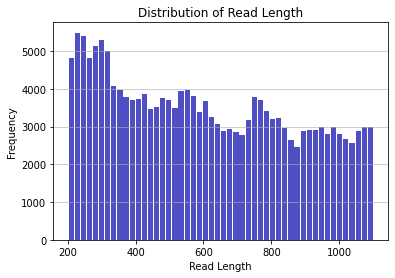

In [14]:
df = parse_fastq('sra_data/SRR17066006.fastq')